In [1]:
# Deep Learning DTSC 740
# Author:  Rodrigo Romero
# Date:    12/07/2022
# Description:  Train and test the LeNet-5 convolutional network 
#               using the CIFAR-10 colorful image dataset.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# History
# Name      Date          Description
# init      12/07/2022    Initial code draft
# v2        12/07/2022    Added dropout layer
# v3        12/11/2022    Added batch normalization 

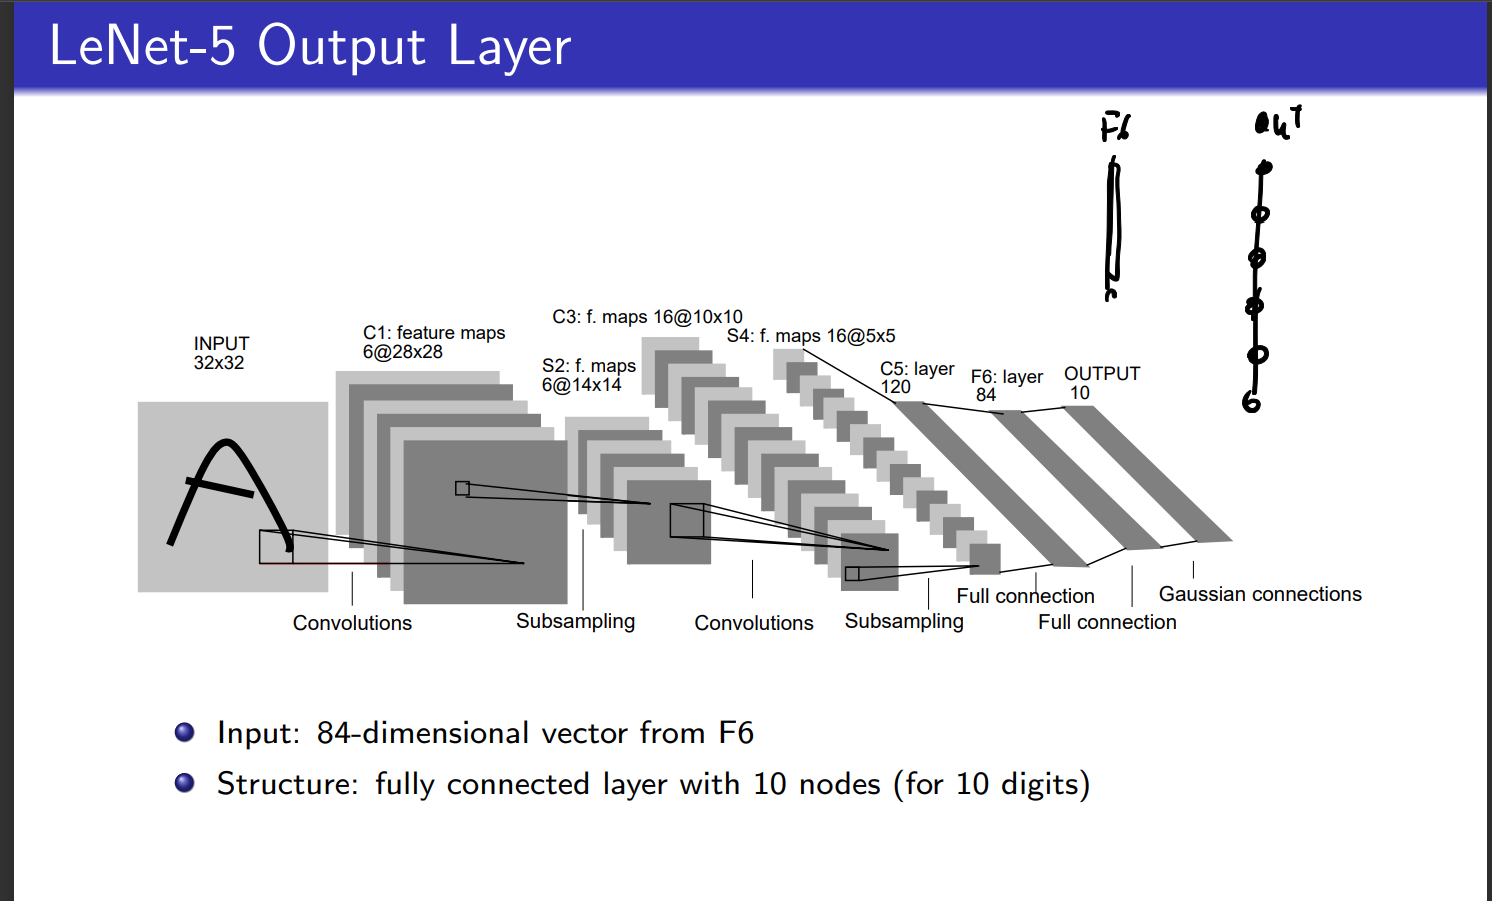

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

TrainX shape: (50000, 32, 32, 3) and TrainY shape: (50000, 1)
TestX shape: (10000, 32, 32, 3) and TestY shape: (10000, 1)
TrainX data:  [59 62 63] and TrainY data: [6]


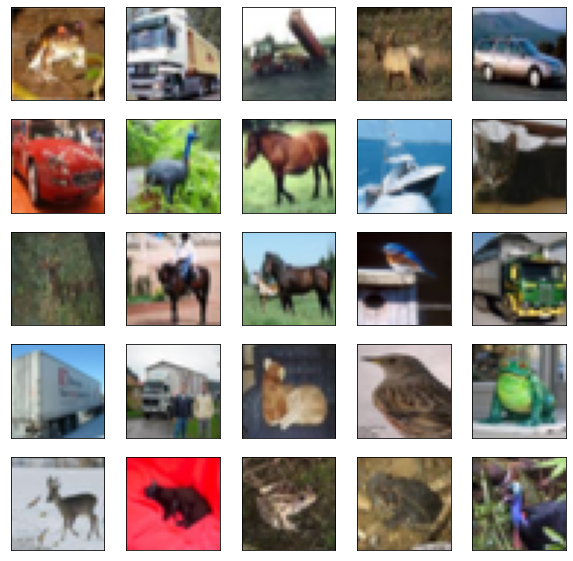

In [3]:
print(f"TrainX shape: {x_train.shape} and TrainY shape: {y_train.shape}")   #50,000 32x32 images       
print(f"TestX shape: {x_test.shape} and TestY shape: {y_test.shape}")       #10,000 32x32 images 
print(f"TrainX data:  {x_train[0][0][0]} and TrainY data: {y_train[0]}")    #rgb channel values from 0 to 255
"""
Label	Description
0	airplane
1	automobile
2	bird
3	cat
4	deer
5	dog
6	frog
7	horse
8	ship
9	truck
"""

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [4]:
# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
# LeNet-5 model
class LeNet(tf.keras.models.Sequential):
    def __init__(self, input_shape, nb_classes, dropout=False, batch_norm=False, model_name='LeNet without dropout/batch normalization'):
        super().__init__()
        self.dropout = dropout
        self.batch_norm = batch_norm
        self.model_name = model_name
        self.add(tf.keras.layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same")) # C1 convolutional layer
        self.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))                                       # S2 pooling layer
        self.add(tf.keras.layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))                        # C3 convolutional layer
        self.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))                                       # S4 pooling layer
        self.add(tf.keras.layers.Conv2D(120, kernel_size=(5,5), strides=(1,1), activation='tanh', padding='valid'))                         # C5 fully connected convolutional layer
        self.add(tf.keras.layers.Flatten())                                                                                                 # Flatten the CNN output so that we can connect it with fully connected layers
        self.add(tf.keras.layers.Dense(120, activation='tanh'))                                                                             # FC6 fully connected layer
        if dropout:                                                                                                                         # Flag for dropout
          self.add(tf.keras.layers.Dropout(rate=0.3))
        if batch_norm:                                                                                                                      # Flag for batch normalization
          self.add(tf.keras.layers.BatchNormalization())                                                                                    
        self.add(tf.keras.layers.Dense(units=10, activation='softmax'))                                                                     # Output layer

        self.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
        
    def eval(self, x_test, y_test):
        test_score = self.evaluate(x_test, y_test)
        print(self)
        print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1]*100))
        print('--------------------------------\n')

    def __str__(self):
        if self.dropout and self.batch_norm: 
          return 'LeNet with one additional dropout and batch normalization layer'
        elif self.dropout:
          return 'LeNet with one additional dropout layer'
        elif self.batch_norm:
          return 'LeNet with one additional batch normalization layer'
        else: 
          return self.model_name

In [11]:
model = LeNet(x_train[0].shape,10)  
model_with_dropout = LeNet(x_train[0].shape,10,dropout=True, batch_norm=False)
model_with_batch_norm = LeNet(x_train[0].shape,10,dropout=False, batch_norm=True)

In [7]:
# Train the model
%%timeit
model.fit(x_train, y_train, epochs=2, batch_size=32)

Epoch 1/2
1563/1563 [==============================] - 12s 5ms/step - loss: 1.8046 - accuracy: 0.3606
Epoch 2/2
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5837 - accuracy: 0.4408
Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4629 - accuracy: 0.4829
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3903 - accuracy: 0.5081
Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3376 - accuracy: 0.5263
Epoch 2/2
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2882 - accuracy: 0.5435
Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2327 - accuracy: 0.5615
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1979 - accuracy: 0.5758
Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1537 - accuracy: 0.5914
Epoch 2/2
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1125 - accura

In [8]:
%%timeit
model_with_dropout.fit(x_train, y_train, epochs=2, batch_size=32)

Epoch 1/2
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8492 - accuracy: 0.3446
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7044 - accuracy: 0.4000
Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6034 - accuracy: 0.4327
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5355 - accuracy: 0.4530
Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4885 - accuracy: 0.4701
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4381 - accuracy: 0.4918
Epoch 1/2
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3868 - accuracy: 0.5095
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3412 - accuracy: 0.5252
Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2963 - accuracy: 0.5402
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2627 - accurac

In [9]:
%%timeit
model_with_batch_norm.fit(x_train, y_train, epochs=2, batch_size=32)

Epoch 1/2
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7676 - accuracy: 0.3771
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5167 - accuracy: 0.4644
Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4114 - accuracy: 0.5029
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3484 - accuracy: 0.5238
Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2961 - accuracy: 0.5455
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2530 - accuracy: 0.5580
Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2087 - accuracy: 0.5742
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1723 - accuracy: 0.5857
Epoch 1/2
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1340 - accuracy: 0.6010
Epoch 2/2
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0949 - accurac

In [10]:
# Evaluate the model
model.eval(x_test,y_test)
model_with_dropout.eval(x_test,y_test)
model_with_batch_norm.eval(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4063 - accuracy: 0.5362
LeNet without dropout/batch normalization
Test loss 1.4063, accuracy 53.62%
--------------------------------

313/313 [==============================] - 1s 3ms/step - loss: 1.2567 - accuracy: 0.5589
LeNet with one additional dropout layer
Test loss 1.2567, accuracy 55.89%
--------------------------------

313/313 [==============================] - 1s 3ms/step - loss: 1.3088 - accuracy: 0.5680
LeNet with one additional batch normalization layer
Test loss 1.3088, accuracy 56.80%
--------------------------------

